In [1]:
#Importo las librerías necesarias para modelar la primera Red neuronal artificial
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import precision_score
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Cargo el Vector de entrenamiento en un dataframe
df = pd.read_csv("Tv.csv")
Training = df
Training

,x1,x2,x3,x4,x5,x6,x7,y
0,-0.015637,0.000393,0.001141,0.001948,0.001923,2.6,2.6,2.6
1,0.004350,0.002341,0.001144,-0.013863,0.001540,1.8,1.8,1.8
2,0.009650,-0.001169,0.002329,-0.011194,0.001150,1.8,1.7,1.7
3,0.019663,0.000782,0.002322,-0.017689,0.000383,2.4,2.4,2.4
4,0.020841,-0.015637,0.000393,0.001948,0.001923,1.9,1.9,1.9
...,...,...,...,...,...,...,...,...
1731,0.000782,0.002280,0.000376,0.002322,0.000383,4.2,3.6,3.6
1732,0.000393,0.001948,0.001141,0.001132,0.001923,3.6,3.6,3.6
1733,-0.013863,0.002341,0.001144,0.001887,0.001540,7.1,7.1,7.1
1734,-0.011194,-0.001169,0.002329,0.001150,0.002274,7.1,3.5,3.5


In [3]:
#Separo los valores de x de los valores de y y los convierto a un arreglo numérico con numpy
arregloy=Training[Training.columns[-1]].to_numpy()
arreglox=Training[Training.columns[:-1]].to_numpy()
print(arreglox)
print(arreglox.shape)
print(arregloy)
print(arregloy.shape)

[[-1.5637e-02  3.9300e-04  1.1410e-03 ...  1.9230e-03  2.6000e+00
   2.6000e+00]
 [ 4.3500e-03  2.3410e-03  1.1440e-03 ...  1.5400e-03  1.8000e+00
   1.8000e+00]
 [ 9.6500e-03 -1.1690e-03  2.3290e-03 ...  1.1500e-03  1.8000e+00
   1.7000e+00]
 ...
 [-1.3863e-02  2.3410e-03  1.1440e-03 ...  1.5400e-03  7.1000e+00
   7.1000e+00]
 [-1.1194e-02 -1.1690e-03  2.3290e-03 ...  2.2740e-03  7.1000e+00
   3.5000e+00]
 [-1.7689e-02  7.8200e-04  2.2800e-03 ...  3.8300e-04  4.8000e+00
   4.8000e+00]]
(1736, 7)
[2.6 1.8 1.7 ... 7.1 3.5 4.8]
(1736,)


In [4]:
#Revisamos si hay valores NaN
sum(~np.isnan(arreglox))

array([1736, 1736, 1736, 1736, 1736, 1736, 1736])

# Configuración y entrenamiento del modelo original

In [5]:
#Configuramos todos los parámetros necesarios para ejecutar la Red Neuronal artificial según el modelo a seguir.
instanteInicial = datetime.now() 
while True:
#Dividimos el array en 70/30 para entrenamiento y evaluación respectivamente.
    X_train, X_test, y_train, y_test = train_test_split(arreglox,arregloy,test_size=0.30)
#Preprocesamos los datos para poder entrenar la red neuronal.
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
#Configuramos los parámetro de la red
    model=MLPRegressor(solver='lbfgs',
                   alpha=1e-5,
                   hidden_layer_sizes=(1,15),
                   random_state=42,
                   activation='logistic',
                   )
#Entrenamos el modelo
    model.fit(X_train,y_train)
    print(model.score(X_train,y_train))
#Creamos una condición para que se ejecute el modelo hasta que se logre el score seleccionado
    if model.score(X_test,y_test) > 0.999996:
        instanteFinal = datetime.now() 
        tiempo = instanteFinal - instanteInicial 
        microsegundos = tiempo.microseconds
        print('tiempo de ejecución:', microsegundos)
        break


0.9999585693556414
0.9999600138409759
0.9998811246009406
0.9999622196378785


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999414885729341
0.9999273302500418
0.9999276436802548
0.9993323372015087
0.9999733990202923
0.9999435650397789


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999160634087022
0.9999768506601235
0.9999612174447485
0.9999639200767145
0.9999920615181579


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999354790240231
0.9999838709951979
0.9999784411936544
0.9998688069217088
0.9999811789190719
0.9999157733619994
0.9994112287006798
0.9999811597414946
0.9999523510526297


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9998669736732504
0.9999833227168935


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999572264931896
0.9999479645784259
0.9991643991223599
0.9997320129046877
0.999950591035866
0.9998296749338069
0.9999674346499197
0.9999901894506205
0.99997270490959
0.9999463752302215
0.9999463667815011
0.9999377681702318
0.9999364335723064


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.999948155032479
0.9998877644977029
0.9999113263046088


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.999871774135549
0.9999370215342882


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999490872720813
0.9999682696687745
0.999983816579465


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999211366879986
0.9994277953567092
0.9999032252816733


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999421236490953
0.9992899809725634
0.9999185529509795
0.9999825805075353
0.9999408632346615


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999304476203414
0.999960816569941
0.9999926929057884
0.9999373795769145
0.9996565764320509
0.9998838682437241


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999398044092314
0.9994042335795139
0.9999376719195037
0.9999578898778354
0.9998371490976078
0.999985600173195
0.9987280475955128
0.9999868075830954


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999345406391079
0.9999576856296236
0.9999302921143173
0.9999923453703637


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999768406180658
0.9999746104937164
0.9999639780572651
0.999985948433911
0.999937769673734
0.9999113346168486


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999769948388605
0.9999394283774907


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999344425462907
0.9999874835353891
0.9992558804399078
0.9999324186399123
0.9999405380565266
0.9999768161997495
0.9999469405422863
0.999917892445388


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999341817395546
0.9998754260518831
0.9999462851733013


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999596303852174
0.9998637507674484


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.999942386108953
0.9999422069486309


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999351031287256
0.9993218564113535
0.9999550544598023


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.999893481934423
0.9999810209836576
0.999951411749185
0.9999484819519868
0.9993559680305129
0.9992882351540538


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999763055854575
0.9999382584152446


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999324929216735
0.9999714205298063
0.9999868678864067


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.999928236388012
0.999922687446316
0.9994717372918688
0.9999824122859727
0.9999352107216349
0.9994992436384681
0.9997332936160476


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9997557052920929
0.9999413903413672
0.9994215678903996


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9998236674027674
0.9994609523420737
0.9990973221538008
0.9999805234993968
0.9999880173168937
0.999991631871714


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999494568201929
0.999912306006271
0.9999696242768389
tiempo de ejecución: 929450


In [6]:
#Evaluamos el modelo con los datos de evaluación.
y_predic= model.predict(X_test)
#Ejecutamos los scores y los errores de la red entrenada
#Error cuadrático medio
print("MSE: "+ str(mean_squared_error(y_test, y_predic)))
#Error absoluto medio
print("MAE: "+ str(mean_absolute_error(y_test, y_predic)))
#Error logarítmico cuadrático medio 
print("MSLE: "+ str(mean_squared_log_error(y_test, y_predic)))
#Error máximo
print("Max Error: "+ str(max_error(y_test, y_predic)))
#Puntaje del coeficiente de determinación
print("R2: " + str(r2_score(y_test,y_predic)))

MSE: 6.132693663009897e-07
MAE: 0.00047778045603995165
MSLE: 5.401367004322375e-08
Max Error: 0.005186656823344071
R2: 0.9999961847395942


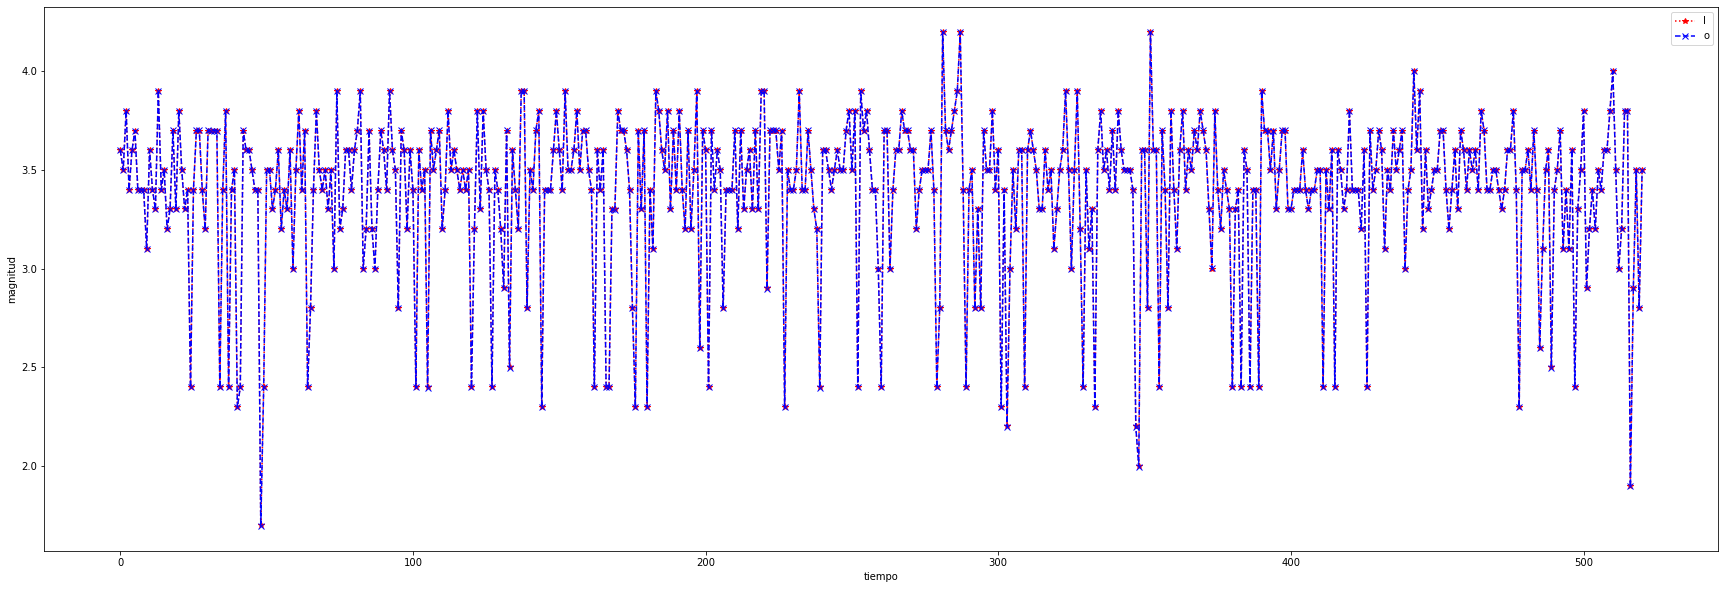

In [7]:
#Graficamos la predicción contra la evaluación
plt.figure(figsize=(30,10))
plt.plot(y_test, color='r', linestyle=':', marker='*', label="original")
plt.plot(y_predic, color='b', linestyle='--', marker='x', label="predicción")
plt.xlabel('tiempo')
plt.ylabel('magnitud')
plt.legend('lower right')

# Probando con 2 capas ocultas de 15 neuronas cada una

In [8]:
#Realizamos la misma red neuronal pero probamos cambiando a 2 capas ocultas de 15 neuronas cada una y 500 épocas.
instanteInicial = datetime.now() 
while True:
    X_train, X_test, y_train, y_test = train_test_split(arreglox,arregloy,test_size=0.30)
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model2=MLPRegressor(solver='lbfgs',
                   alpha=1e-5,
                   hidden_layer_sizes=(2,15),
                   random_state=42,
                   activation='logistic',
                   max_iter=500
                   )
    model2.fit(X_train,y_train)
    print(model2.score(X_train,y_train))

    if model2.score(X_train,y_train) > 0.999996:
        instanteFinal = datetime.now() 
        tiempo = instanteFinal - instanteInicial 
        microsegundos = tiempo.microseconds
        print('tiempo de ejecución:', microsegundos)
        break

0.9999898404302856
0.9998482790879705
0.999955093669363
0.9997789582649284
0.9999110461670735


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9999844630765163
0.9997963213365898
0.9999740063510133
0.9999144710442656
0.9996133170526251
0.9998807580436601
0.9998376484934388
0.9999082908785859
0.9995274676590138
0.9993435358620865
0.9995722716220501
0.9997192115837964
0.9996079502433418
0.9996403711477508
0.999732110161365
0.9995613630551538
0.9996555884996353
0.9998713017366583
0.9994012129919788
0.9995148429394487
0.9999159954375315
0.9999160975739689
0.9998278675841009
0.9996674740998266
0.9998144991465886
0.9992585191634924
0.9997320263506392
0.9997925184111134
0.9994738185009893
0.9999209149713486
0.9998852065314685
0.9992900129044108
0.9996155107853829
0.9996685537175724
0.9998841375915185
0.9998099871474612
0.9995700069980991
0.9991644936821849
0.9993060835989411
0.9993945674420733
0.9993766271583251
0.9989850402500431
0.9997308351467616
0.9996657410952946
0.9998007958789571
0.9997536303553848
0.9993832144162068
0.9996413587202072
0.9995121300626958
0.9999691627272989
0.9998057252242
0.9994838336569085
0.99962478015586

In [9]:
#Evaluamos el modelo con los datos de evaluación.
y_predic= model2.predict(X_test)
#Ejecutamos los scores y los errores de la red entrenada
#Error cuadrático medio
print("MSE: "+ str(mean_squared_error(y_test, y_predic)))
#Error absoluto medio
print("MAE: "+ str(mean_absolute_error(y_test, y_predic)))
#Error logarítmico cuadrático medio 
print("MSLE: "+ str(mean_squared_log_error(y_test, y_predic)))
#Puntaje del coeficiente de determinación
print("R2: " + str(r2_score(y_test,y_predic)))
#Error máximo
print("Max Error: "+ str(max_error(y_test, y_predic)))

MSE: 3.1148343731473035e-07
MAE: 0.00024621456217195495
MSLE: 2.3018977268730717e-08
R2: 0.9999978674705591
Max Error: 0.005297426994379961


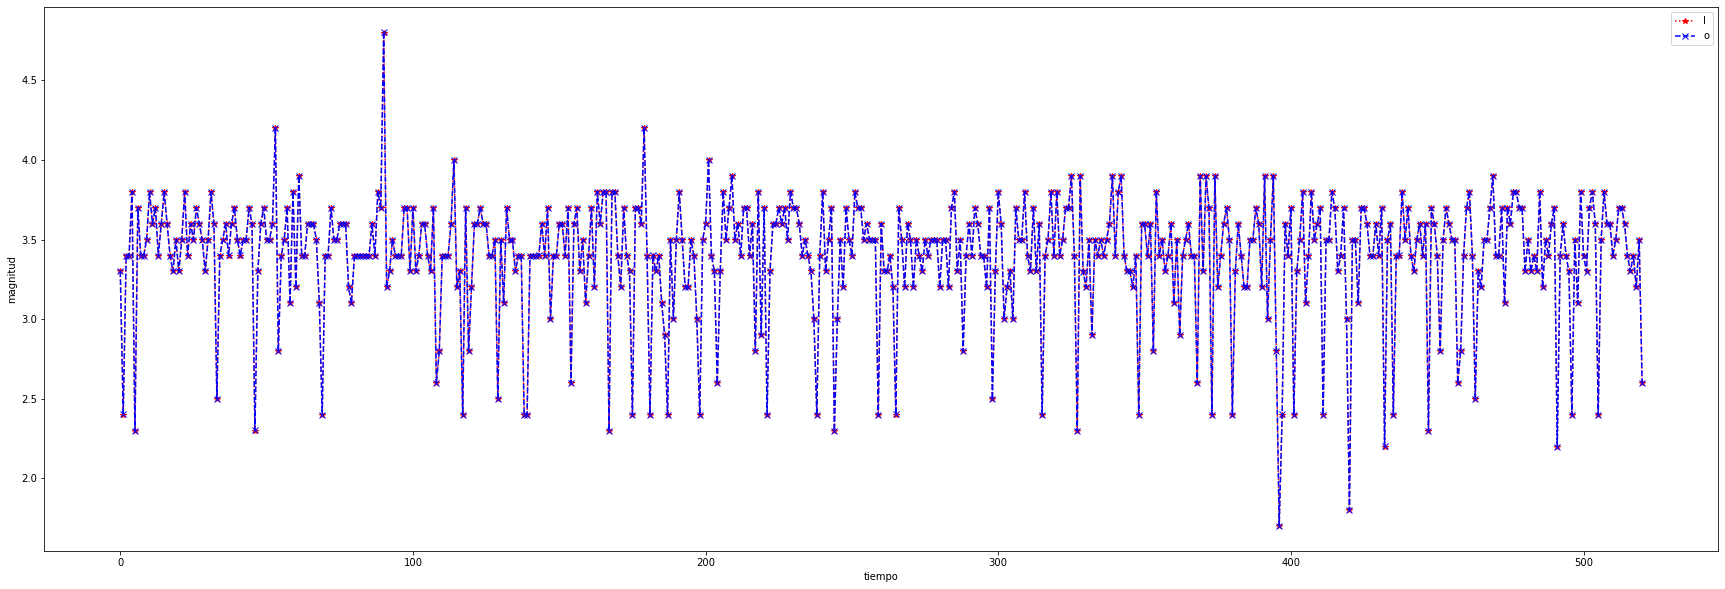

In [10]:
#Graficamos la predicción contra la evaluación
plt.figure(figsize=(30,10))
plt.plot(y_test, color='r', linestyle=':', marker='*', label="original")
plt.plot(y_predic, color='b', linestyle='--', marker='x', label="predicción")
plt.xlabel('tiempo')
plt.ylabel('magnitud')
plt.legend('lower right')

# Probando con función de activación Relu

In [11]:
#Realizamos la misma red neuronal pero probamos cambiando a función de activación relu
instanteInicial = datetime.now() 
while True:
    X_train, X_test, y_train, y_test = train_test_split(arreglox,arregloy,test_size=0.30)
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model3=MLPRegressor(solver='lbfgs',
                   alpha=1e-5,
                   hidden_layer_sizes=(1,15),
                   random_state=42,
                   activation='relu'
                   )
    model3.fit(X_train,y_train)
    print(model3.score(X_train,y_train))

    if model3.score(X_train,y_train) > 0.999996:
        instanteFinal = datetime.now() 
        tiempo = instanteFinal - instanteInicial 
        microsegundos = tiempo.microseconds
        print('tiempo de ejecución:', microsegundos)
        break

0.9839743186791133
0.9350811071741734
0.9369965964155765
0.9875478303938783
0.9999999732977649
tiempo de ejecución: 270061


In [12]:
#Evaluamos el modelo con los datos de evaluación.
y_predic= model3.predict(X_test)
#Ejecutamos los scores y los errores de la red entrenada
#Error cuadrático medio
print("MSE: "+ str(mean_squared_error(y_test, y_predic)))
#Error absoluto medio
print("MAE: "+ str(mean_absolute_error(y_test, y_predic)))
#Error logarítmico cuadrático medio 
print("MSLE: "+ str(mean_squared_log_error(y_test, y_predic)))
#Puntaje del coeficiente de determinación
print("R2: " + str(r2_score(y_test,y_predic)))
#Error máximo
print("Max Error: "+ str(max_error(y_test, y_predic)))

MSE: 2.2319117221102848e-09
MAE: 2.5591937623698456e-05
MSLE: 1.3738698493860235e-10
R2: 0.999999984352194
Max Error: 0.00041099896743501674


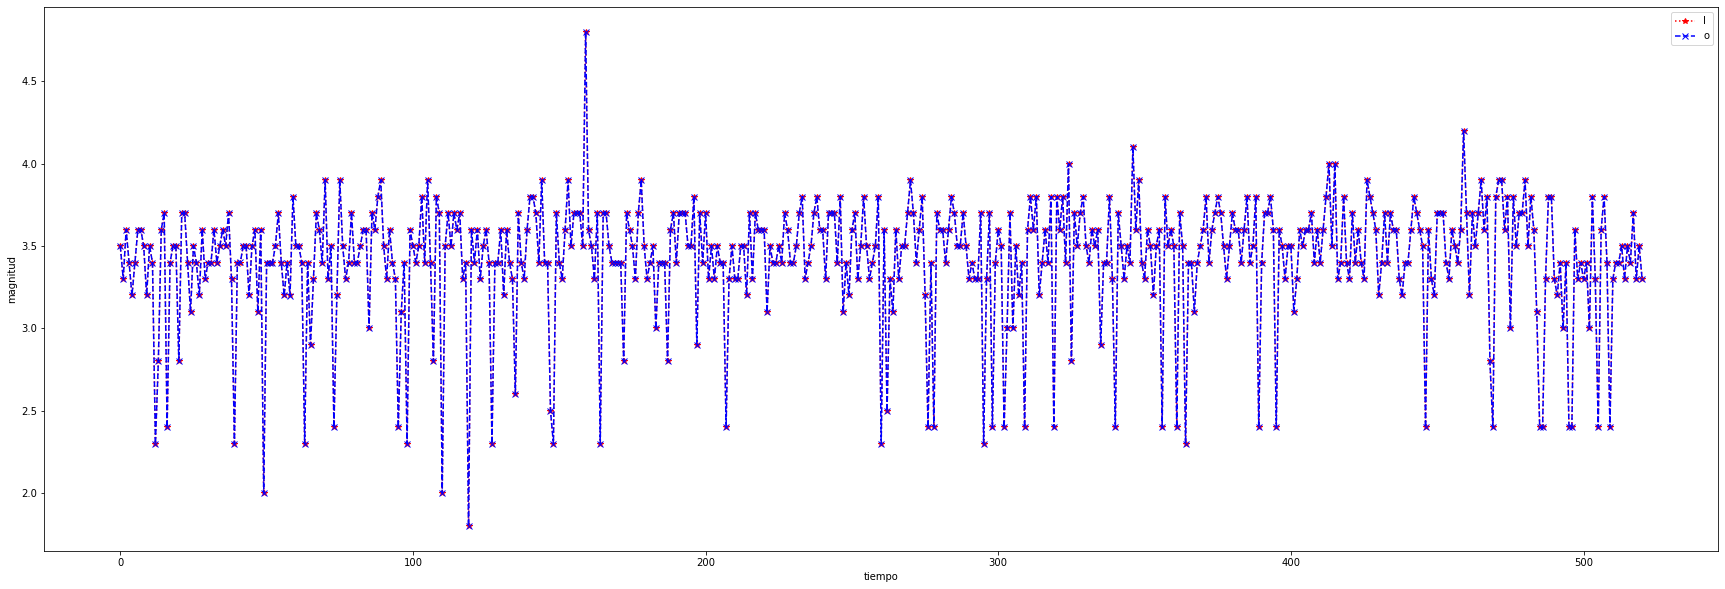

In [13]:
#Graficamos la predicción contra la evaluación
plt.figure(figsize=(30,10))
plt.plot(y_test, color='r', linestyle=':', marker='*', label="original")
plt.plot(y_predic, color='b', linestyle='--', marker='x', label="predicción")
plt.xlabel('tiempo')
plt.ylabel('magnitud')
plt.legend('lower right')

# Probando con función de activación Relu y con 2 capas ocultas de 15 neuronas cada una

In [14]:
#Realizamos la misma red neuronal pero probamos cambiando a función de activación relu y 2 capas ocultas de 15 neuronas cada una
instanteInicial = datetime.now() 
while True:
    X_train, X_test, y_train, y_test = train_test_split(arreglox,arregloy,test_size=0.30)
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model4=MLPRegressor(solver='lbfgs',
                   alpha=1e-5,
                   hidden_layer_sizes=(2,15),
                   random_state=42,
                   activation='relu',
                   max_iter=500
                   )
    model4.fit(X_train,y_train)
    print(model4.score(X_train,y_train))

    if model4.score(X_train,y_train) > 0.999996:
        instanteFinal = datetime.now() 
        tiempo = instanteFinal - instanteInicial 
        microsegundos = tiempo.microseconds
        print('tiempo de ejecución:', microsegundos)
        break

0.994141669510448
0.9266044987096891
0.9849403292360726
0.9343086740379596
0.9269412065218662
0.9343412392096191
0.9340728419850847
0.9845043633408337
0.9599502586584738


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9989130344308936
0.9889146042248116
0.9936678916998566
0.9284912528613233
0.9346430552902422
0.9227935336356228
0.9657885989838495
0.9784022364343161
0.9759698753257693
0.9249287730064528
0.9164357197389896
0.9256239780322554
0.9232961175401336
0.9227732168582244
0.9319217756412445
0.9037217393988283
0.9192536516897505
0.9177435158559878
0.9220968187299275
0.922673545898814
0.9258289990154193
0.9360737235970258
0.9773420206087344
0.9998953855056694
0.9999729322620052
0.9853702603256349
0.9183930837198491
0.9354563132627188
0.9162548806833913
0.9191316364410891
0.9768529786636537
0.9853389309770435
0.9760115787039734
0.9094499209696377
0.9706549536159359
0.9260868580682501
0.9892939434346216
0.9999973954555095
tiempo de ejecución: 40111


In [15]:
#Evaluamos el modelo con los datos de evaluación.
y_predic= model4.predict(X_test)
#Ejecutamos los scores y los errores de la red entrenada
#Error cuadrático medio
print("MSE: "+ str(mean_squared_error(y_test, y_predic)))
#Error absoluto medio
print("MAE: "+ str(mean_absolute_error(y_test, y_predic)))
#Error logarítmico cuadrático medio 
print("MSLE: "+ str(mean_squared_log_error(y_test, y_predic)))
#Puntaje del coeficiente de determinación
print("R2: " + str(r2_score(y_test,y_predic)))
#Error máximo
print("Max Error: "+ str(max_error(y_test, y_predic)))

MSE: 1.6849126445107117e-07
MAE: 0.00013905443085210665
MSLE: 8.265966562498321e-09
R2: 0.9999987730060885
Max Error: 0.007839697123896538


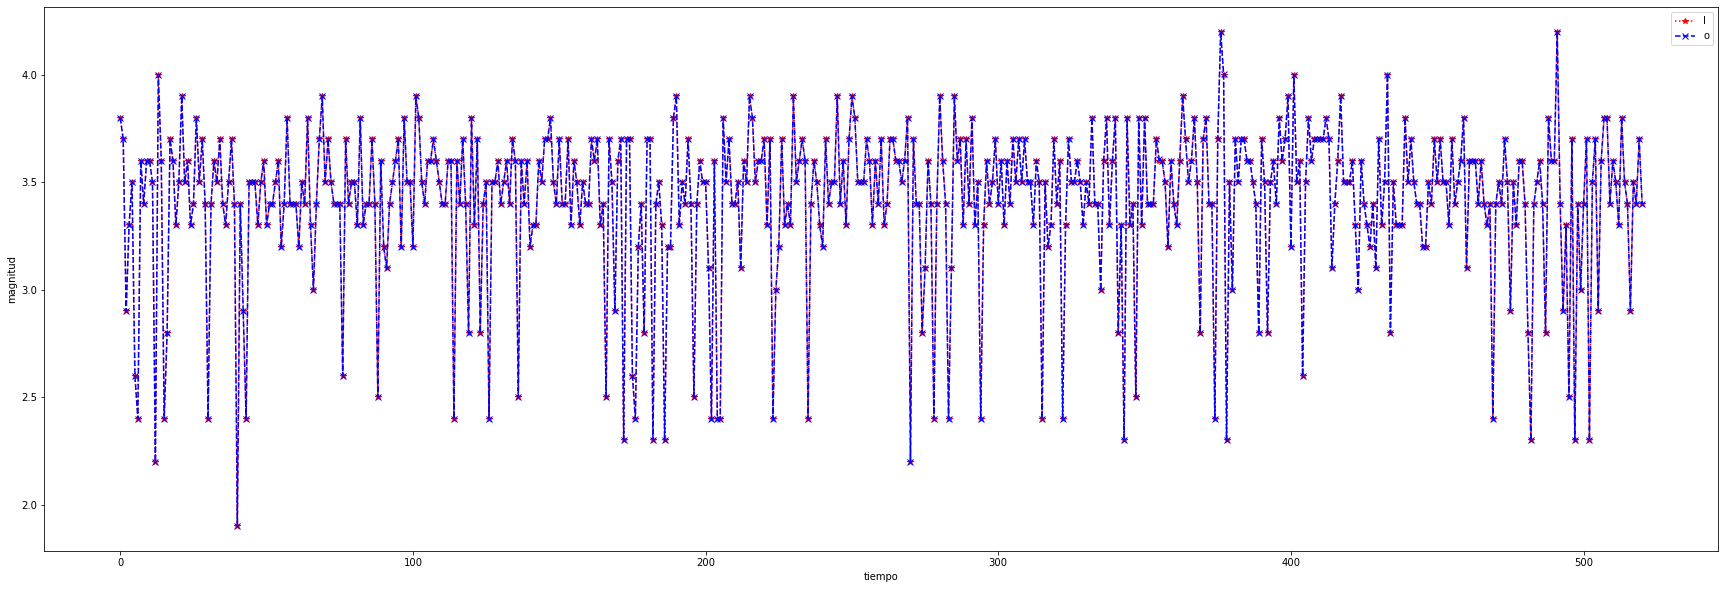

In [16]:
#Graficamos la predicción contra la evaluación
plt.figure(figsize=(30,10))
plt.plot(y_test, color='r', linestyle=':', marker='*', label="original")
plt.plot(y_predic, color='b', linestyle='--', marker='x', label="predicción")
plt.xlabel('tiempo')
plt.ylabel('magnitud')
plt.legend('lower right')